# 1. Rolling dice markov chain example
$win = 1/6$

$roll\ again = 1/3$

$pass = 1/2$

Each row coordinates with the beginning position
Each colomn coordinates with the end position
$$ P =
\begin{bmatrix}
p_{11} & p_{12} & p_{11'} & p_{12'}\\
p_{21} & p_{22} & p_{21'} & p_{22'}\\
p_{1'1} & p_{1'2} & p_{1'1'} & p_{1'2'}\\
p_{2'1} & p_{2'2} & p_{2'1'} & p_{2'2'}
\end{bmatrix}
=
\begin{bmatrix}
roll\ again & pass & win & 0\\
pass & roll\ again & 0 & win\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1
\end{bmatrix}
$$

$p_{11'}(n)$ is the probability that player 1 will win given n rolls.

![](https://cdn.mathpix.com/snip/images/hICl4OF_2WACgnl0M5gvYMc5lDP5jor7rNQTlSC7M54.original.fullsize.png)


In [111]:
win = 1/6
roll_again = 2/6
pass = 3/6

rolls = 6

starting_person = 1
end_person = 1

P = [roll_again pass win 0;
    pass roll_again 0 win;
    0 0 1 0;
    0 0 0 1]

P^rolls

4×4 Array{Float64,2}:
 0.16746   0.167438  0.403978  0.261124
 0.167438  0.16746   0.261124  0.403978
 0.0       0.0       1.0       0.0
 0.0       0.0       0.0       1.0

# 2. Project Start

## 2.0 Import

In [2]:
import PyPlot
plt = PyPlot
import StatsBase
sb = StatsBase
using Pkg
Pkg.add("Distributions")
using Distributions

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


In [2]:
function ChiSquared(freqList, expected)
    value = 0
    for i in 1:length(freqList)
        value += ((freqList[1]-expected)^2)/expected
    end
    X=Chisq(length(freqList)-1)
    return (cdf.(X,value))
end

ChiSquared (generic function with 1 method)

## 2.1 Simulate Problem

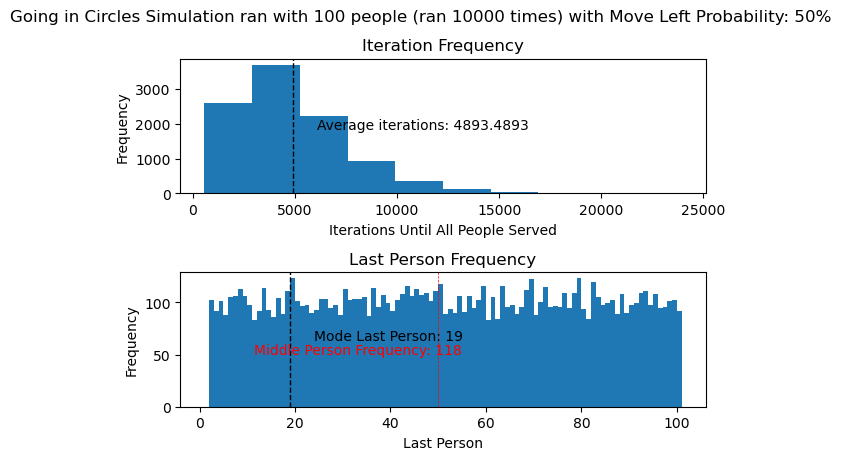

Average iterations: 4893.4893
Mode of last person: 19


In [14]:
people = 100 # Number of people being served
simulation_iterations = 10000
prob = 50
# left_prob = 1/2 # Probability of waiter moving left
# right_prob = 1/2 # Probability of waiter moving right

# Run until all people are served
function serverSimulation(people, prob)
    people_served = [false for _ in 1:people] # List of whether the person has been served
    person = 1 # Person the waiter is currently with
    iterations = 0
    people_served[person] = true
    while !(all(people_served))
        # Serve current person
        # Determine direction
        random = rand()
        if(random < (prob/100))
            # Move left, looping around if needed
            if person == 1
                person = people
            else
                person -= 1
            end
        else
            # Move right, looping around if needed
            if person == people
                person = 1
            else
                person += 1
            end
        end
        people_served[person] = true
        iterations += 1
    end
#     println(person, " ", people_served)
#     println("Iterations: ", iterations)
    return Dict("iterations"=>iterations, "last_person"=>person)
end

results = [serverSimulation(people, prob) for _ in 1:simulation_iterations]
iteration_results = [result["iterations"] for result in results]
last_person_results = [result["last_person"] for result in results]
# Start figure
title = string("Going in Circles Simulation ran with ", people, " people (ran ", simulation_iterations, " times) with Move Left Probability: ", prob, "%")
plt.suptitle(title)

#Last person Frequency List
last_person_freq = zeros(100)
for i in last_person_results
    last_person_freq[i] += 1
end

# Add iteration subplot
plt.subplot(2, 1, 1)
# Plot data
hist_heights, _, _ = plt.hist(iteration_results)
# Add labels
plt.ylabel("Frequency")
plt.xlabel("Iterations Until All People Served")
plt.title("Iteration Frequency")
# Add average iteration information
average_iterations = sum(iteration_results) / length(iteration_results)
plt.axvline(average_iterations, color="black", linestyle="dashed", linewidth=1)
plt.annotate( string("Average iterations: ", average_iterations), (average_iterations + maximum(iteration_results)*0.05, maximum(hist_heights) / 2))

# Add last person subplot
plt.subplot(2, 1, 2)
# Plot data
hist_heights, bins, _ = plt.hist(last_person_results, bins=collect(1:people+1))
# Add labels
plt.ylabel("Frequency")
plt.xlabel("Last Person")
plt.title("Last Person Frequency")

# Add mode (most often occuring value) and Middle Person information  
mode_last_person = sb.mode(last_person_results)
if(mode_last_person>50)
    # Note the mode 
    plt.axvline(mode_last_person, color="black", linestyle="dashed", linewidth=1)
    plt.annotate(string("Mode Last Person: ", mode_last_person), (mode_last_person + maximum(last_person_results)*0.05, maximum(hist_heights) / 2), verticalalignment="bottom", horizontalalignment="right")
    # Note the middle person
    plt.axvline(people/2, color="red", linestyle="dashed", linewidth=0.5)
    plt.annotate(string("Middle Person Frequency: ", Integer(last_person_freq[Integer(people/2)])), (people/2 + maximum(last_person_results)*0.05, maximum(hist_heights) / 2),verticalalignment="top", horizontalalignment="left", color="red")
else
    # Note the mode 
    plt.axvline(mode_last_person, color="black", linestyle="dashed", linewidth=1)
    plt.annotate(string("Mode Last Person: ", mode_last_person), (mode_last_person + maximum(last_person_results)*0.05, maximum(hist_heights) / 2), verticalalignment="bottom", horizontalalignment="left")
    # Note the middle person
    plt.axvline(people/2, color="red", linestyle="dashed", linewidth=0.5)
    plt.annotate(string("Middle Person Frequency: ", Integer(last_person_freq[Integer(people/2)])), (people/2 + maximum(last_person_results)*0.05, maximum(hist_heights) / 2),verticalalignment="top", horizontalalignment="right", color="red")
end


println("Average iterations: ", average_iterations)
println("Mode of last person: ", mode_last_person)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(title)


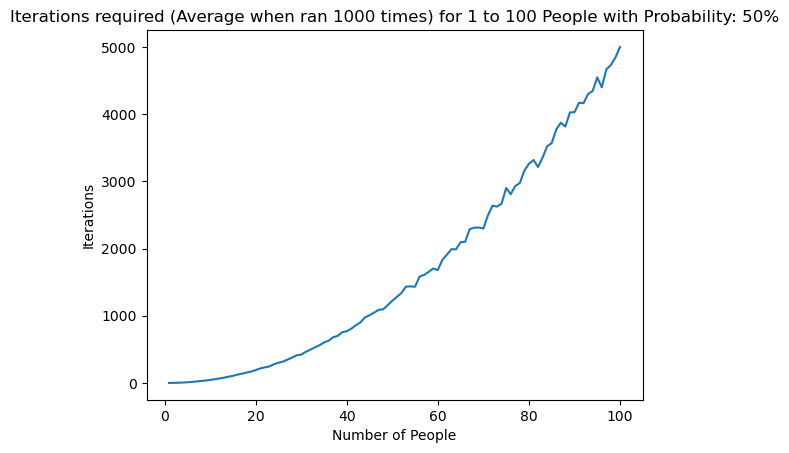

In [24]:
#Range of people
total = 100
summation = 0
simulation_iterations = 1000
iteration_Counts = []
#Simulate
for i in 1:total
    summation = 0
    for trial in 1:simulation_iterations
        result = serverSimulation(i,50)
        summation += result["iterations"]
    end
    append!(iteration_Counts, summation/simulation_iterations)
end

    
#results = [serverSimulation(i, 50) for i in 1:total]
#iteration_Counts = [result["iterations"] for result in results]
#Plot Iterations by People
plt.ylabel("Iterations")
plt.xlabel("Number of People")
plt.title(string("Iterations required (Average when ran ", simulation_iterations," times) for 1 to ",total," People with Probability: 50%"))
plt.plot(collect(1:total), iteration_Counts)
plt.savefig(title)

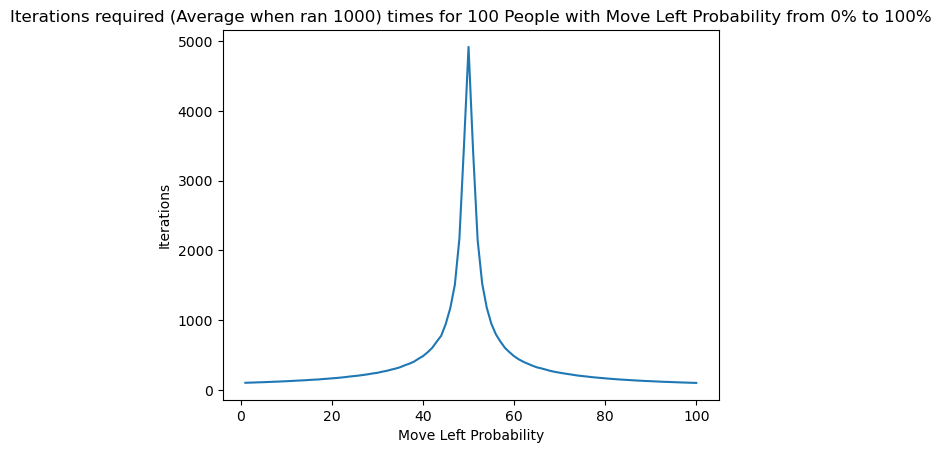

In [26]:
#Range of prob
total = 100
summation = 0
simulation_iterations = 1000
iteration_Counts = []
#Simulate
for i in 1:total
    summation = 0
    for trial in 1:simulation_iterations
        result = serverSimulation(100,i)
        summation += result["iterations"]
    end
    append!(iteration_Counts, summation/simulation_iterations)
end

    
#results = [serverSimulation(i, 50) for i in 1:total]
#iteration_Counts = [result["iterations"] for result in results]
#Plot Iterations by People
plt.ylabel("Iterations")
plt.xlabel("Move Left Probability")
plt.title(string("Iterations required (Average when ran ", simulation_iterations,") times for 100 People with Move Left Probability from 1% to 100%"))
plt.plot(collect(1:total), iteration_Counts)
plt.savefig(title)

## 2.2 Generate Matrix

In [114]:
# Create Matrix
people = 5 ## Number of people
left_prob = 1/2
right_prob = 1/2

P = vcat([[left_prob right_prob] for state_i in 1:2]...) # ... is the splat operator, equal to *array in python
P^120

2×2 Array{Float64,2}:
 0.5  0.5
 0.5  0.5

# 3. Testing

In [71]:
rand(1:2)

1